# CSE475 Capstone - Luan Nguyen
**Dataset**: Fashion MNIST ([Link](https://www.kaggle.com/datasets/zalando-research/fashionmnist))

**Name**: Luan Nguyen

**Date**: November 9, 2025

**Professor**: Robert K. Atkinson

# Milestone 1: Data Preparation Report

Due Date: 11.9 (Sun)

Purpose: To prepare dataset for analysis by performing exploratory data analysis (EDA), data cleaning, and feature engineering.

## Exploratory Data Analysis (EDA)

### Load the dataset and display the first few rows to understand its structure.

In [36]:
from tensorflow.keras.datasets import fashion_mnist # dataset
import numpy as np #  used for fast numerical operations and array manipulation
import pandas as pd # handle CSV files and tabular data
import matplotlib.pyplot as plt # # plotting images and graphs
import seaborn as sns # plotting histograms

# Load the data
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [37]:
# Load data into a DataFrame object
df = pd.DataFrame(fashion_mnist.load_data())

In [38]:
df.head()

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [39]:
df.sample()

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."


In [40]:
# Get a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
 1   1       2 non-null      object
dtypes: object(2)
memory usage: 164.0+ bytes


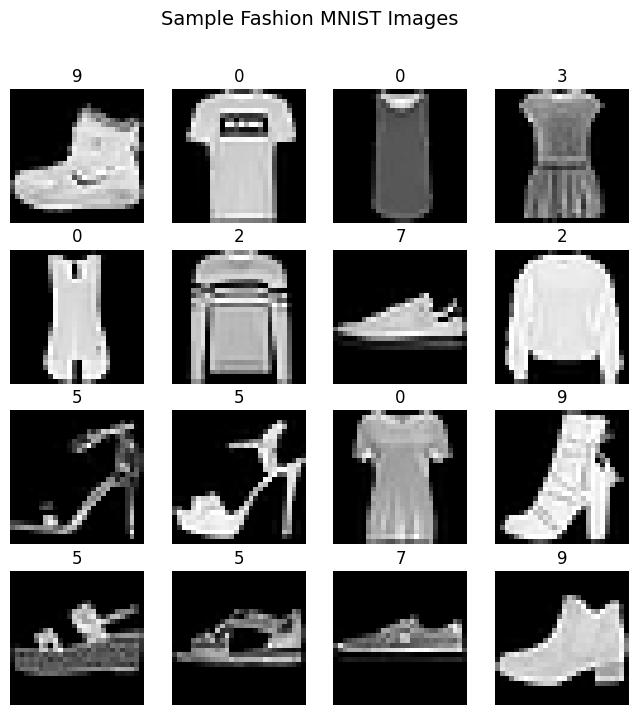

In [41]:
# view samples
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=14)
plt.show()


### Analyze data distributions for numerical features (e.g., using histograms, box plots).

In [42]:
# Pixel density statistics, flattened to 1D
pd.DataFrame(X_train.reshape(-1, 28*28)).describe().T[['mean','std','min','max']].head()


,mean,std,min,max
0,0.000800,0.092554,0.0,16.0
1,0.005783,0.249033,0.0,36.0
2,0.030083,0.767868,0.0,119.0
3,0.103800,2.512017,0.0,164.0
4,0.249683,4.331376,0.0,224.0


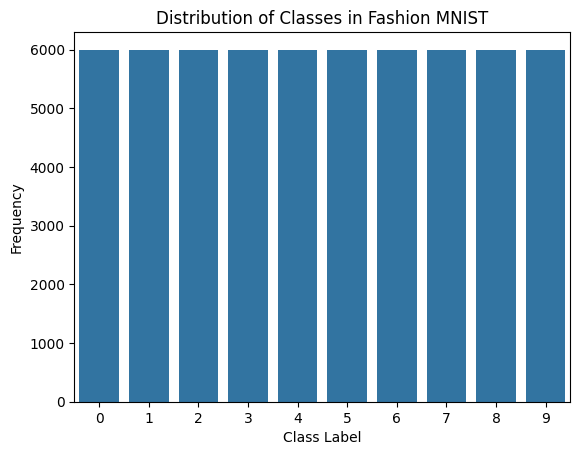

In [43]:
# Check Class Distribution
# Balanced classes are ideal for classification; unbalanced ones require weighting.
sns.countplot(x=y_train)
plt.title("Distribution of Classes in Fashion MNIST")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

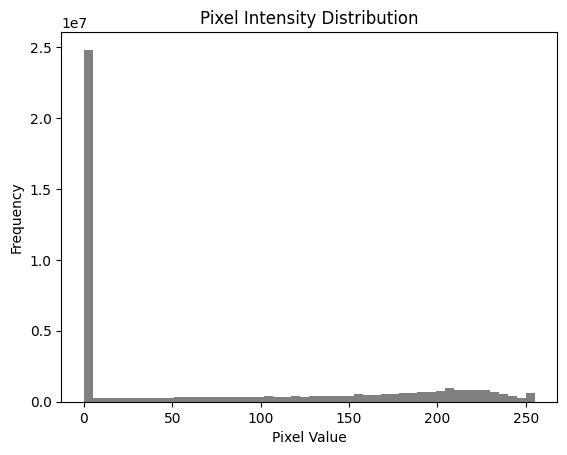

In [44]:
# Visualize intensity histograms
plt.hist(X_train.ravel(), bins=50, color="gray")
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


## Data Cleaning

In [45]:
# Check for Missing or Corrupted Data
# Although Keras datasets are clean, we verify integrity.
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())

Missing values in X_train: 0
Missing values in y_train: 0


In [46]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Pixel range after normalization:", X_train.min(), "to", X_train.max())

Pixel range after normalization: 0.0 to 1.0


In [47]:
# Reshapre data for CNN
# CNN needs 4 inputs (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("New training shape:", X_train.shape)
print("New testing shape:", X_test.shape)

New training shape: (60000, 28, 28, 1)
New testing shape: (10000, 28, 28, 1)


## Feature Engineering

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This synthetically increases dataset diversity and improves model generalization.
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation between 0–10°
    zoom_range=0.1,         # Random zoom
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    horizontal_flip=True     # Random horizontal flips
)

In [49]:
# Fit generator on training data
datagen.fit(X_train)

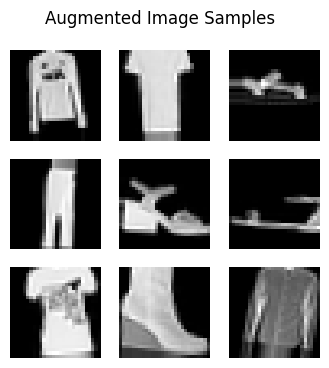

In [50]:
# Preview augmented images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(4, 4))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
    plt.suptitle("Augmented Image Samples", fontsize=12)
    plt.show()
    break  # Display one batch only

## Summary & Reflection

In [51]:
print(f"Training set size: {len(X_train)} images")
print(f"Test set size: {len(X_test)} images")
print(f"Input shape: {X_train.shape[1:]}")


Training set size: 60000 images
Test set size: 10000 images
Input shape: (28, 28, 1)


### Challenges I Faced
Initially, I went on Hugging Face and Kaggle to explore a variety of datasets (MNIST, CIFAR-10, Fruits 360) and their limitations. I decided to go with CNN since it is the most practical in my experience.

The hardest part of this milestone one was finding all the correct way to display and visualize the data. I had to go over the old notebooks we did in class to find all the methods and functions and tailored it to this notebook.

### Key Insights from the Dataset

After comprehensive EDA, we confirmed that there are no missing data, allowing straightforward model training which is nice. The dataset is very balanced across 10 classes.

### What I Learned

With no prior knowledge of machine learning before this class, I realized that image datasets require a different mindset and methodology than tabular data.
For example, normalization and augmentation are critical preprocessing steps for CNNs. Additionally, visualize the dataset during EDA helps us set the expectation for how CNNs could help, given a large amount of image data.

# Milestone 2: Model Development Report

Due Date: 11.23 (Sun)


Purpose: To apply machine learning algorithms to your dataset, evaluate model performance,
and document the modeling process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator